In [8]:
import pandas as pd
import os

In [22]:
#Merge the 12 months of sales data into a single CSV File


files = [file for file in os.listdir('data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
    all_months_data.to_csv("all_data.csv", index=False)


In [24]:
#Read in updated dataframe
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


## Clean up the data

Drop rows of NAN

In [36]:
#nan_df = all_data[all_data.isna().any(axis=1)]
#nan_df.head()

#all_data = all_data.dropna(how='all')
#all_data.head()

# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
18382,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
18383,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
18384,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
18385,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
18386,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


Find 'Or' and delete it

In [37]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

Convert columns to the correct type

In [39]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Augment data with additional columns
Task 2: Add Month Column

In [38]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
18382,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
18383,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
18384,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
18385,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
18386,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


Task 3: Add a sales columns

In [40]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
18382,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
18383,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
18384,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
18385,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
18386,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


Task 4: Add city column

In [56]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
18382,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22,21,1
18383,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15,11,1
18384,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14,40,1
18385,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA),20,59,1
18386,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY),19,53,1


## Question 1: What was the best month for sales? How much was earned that month?

In [43]:
all_data.groupby(['Month']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,1623581625411650071656221662501663091665671672...,Flatscreen TVAAA Batteries (4-pack)34in Ultraw...,19,5167.43,04/01/19 01:1104/01/19 01:1504/01/19 00:1204/0...,"444 12th St, New York City, NY 10001672 2nd St...",5170.42
5,1940951940961940971940981940991941001941011941...,Wired HeadphonesAA Batteries (4-pack)27in FHD ...,18638,3124569.68,05/16/19 17:1405/19/19 14:4305/24/19 11:3605/0...,"669 2nd St, New York City, NY 10001844 Walnut ...",3142047.46
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


range(1, 13)


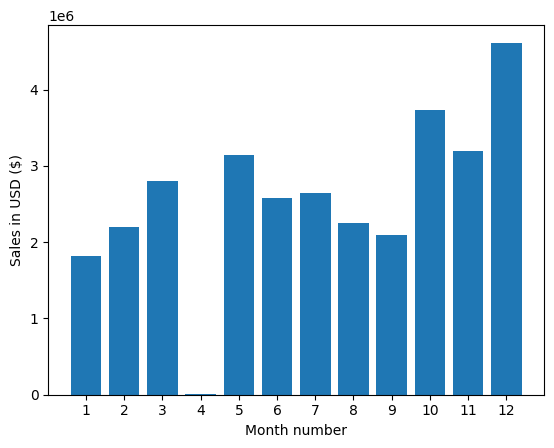

In [44]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

## Question 2: What city sold the most product?

In [47]:
all_data.groupby(['City']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),2366852366992367032367142367172367192367442367...,Apple Airpods HeadphonesAA Batteries (4-pack)B...,14969,2497028.32,08/23/19 19:2908/20/19 21:0708/08/19 06:0908/3...,"238 Highland St, Atlanta, GA 30301763 Hill St,...",98905,2511043.66
Austin (TX),2367052367102367492367522367732367742367952368...,AA Batteries (4-pack)Macbook Pro LaptopAAA Bat...,10061,1638385.96,08/11/19 22:2108/04/19 02:4608/30/19 20:1308/2...,"27 North St, Austin, TX 73301654 Chestnut St, ...",65937,1646898.16
Boston (MA),2366812366912367122367262367352367392367412367...,AA Batteries (4-pack)USB-C Charging CableAA Ba...,20338,3285667.02,08/26/19 20:5208/23/19 07:3408/30/19 07:1408/2...,"295 1st St, Boston, MA 02215916 Meadow St, Bos...",133434,3307761.85
Dallas (TX),2366712366832366862366982367022367112367202367...,Bose SoundSport Headphones27in FHD MonitorAAA ...,15211,2500938.78,08/15/19 15:1108/31/19 15:4708/15/19 19:1308/0...,"492 Ridge St, Dallas, TX 75001196 West St, Dal...",99218,2515134.93
Los Angeles (CA),2366732366762366792366882367002367072367362367...,AA Batteries (4-pack)34in Ultrawide MonitorMac...,29890,4873444.21,08/29/19 20:5908/04/19 19:5208/07/19 15:4308/0...,"631 2nd St, Los Angeles, CA 90001470 Cherry St...",196218,4901171.73
New York City (NY),2366742366842366872366942366962367232367272367...,AA Batteries (4-pack)Lightning Charging CableU...,25191,4192978.15,08/15/19 19:5308/09/19 16:5008/23/19 12:5408/1...,"736 14th St, New York City, NY 10001669 12th S...",166004,4217729.65
Portland (ME),2367282367512368152368662368912369002369662372...,ThinkPad Laptop27in 4K Gaming Monitor27in FHD ...,2485,404818.96,08/10/19 11:2108/03/19 09:1808/28/19 17:5508/1...,"526 North St, Portland, ME 04101534 Washington...",16172,407221.78
Portland (OR),2366722366822366932367152367682367722368422368...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,10169,1662835.59,08/06/19 14:4008/19/19 12:4008/12/19 21:5708/2...,"149 7th St, Portland, OR 97035118 Johnson St, ...",66643,1672140.72
San Francisco (CA),2366752366772366782366802366892366902366922366...,Wired Headphones20in MonitorWired HeadphonesLG...,45252,7401123.43,08/02/19 23:5408/13/19 07:1608/25/19 20:1108/0...,"470 Hill St, San Francisco, CA 94016918 6th St...",297760,7445129.14


## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [52]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
18382,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22,21,1
18383,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15,11,1
18384,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14,40,1
18385,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA),20,59,1
18386,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY),19,53,1


NameError: name 'hours' is not defined

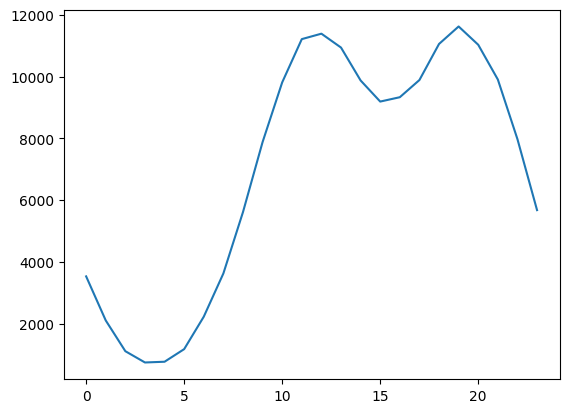

In [54]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

## Question 4: What products are most often sold together?

In [58]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head(20)

C:\Users\Chamathka\AppData\Local\Temp\ipykernel_13596\1244471524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
18428,236716,"AA Batteries (4-pack),USB-C Charging Cable"
18442,236729,"iPhone,Apple Airpods Headphones"
18444,236730,"Google Phone,Wired Headphones"
18514,236799,"Google Phone,Wired Headphones"
18545,236829,"Vareebadd Phone,USB-C Charging Cable"
18603,236885,"27in 4K Gaming Monitor,USB-C Charging Cable"
18713,236992,"Google Phone,USB-C Charging Cable"
18735,237013,"iPhone,Lightning Charging Cable"
18768,237045,"Bose SoundSport Headphones,Wired Headphones"
18787,237063,"LG Dryer,AA Batteries (4-pack)"


In [59]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 899
('Google Phone', 'USB-C Charging Cable') 881
('iPhone', 'Wired Headphones') 404
('Google Phone', 'Wired Headphones') 373
('Vareebadd Phone', 'USB-C Charging Cable') 325
('iPhone', 'Apple Airpods Headphones') 323
('Google Phone', 'Bose SoundSport Headphones') 196
('USB-C Charging Cable', 'Wired Headphones') 146
('Vareebadd Phone', 'Wired Headphones') 128
('Lightning Charging Cable', 'Wired Headphones') 89


What product sold the most? Why do you think it sold the most?

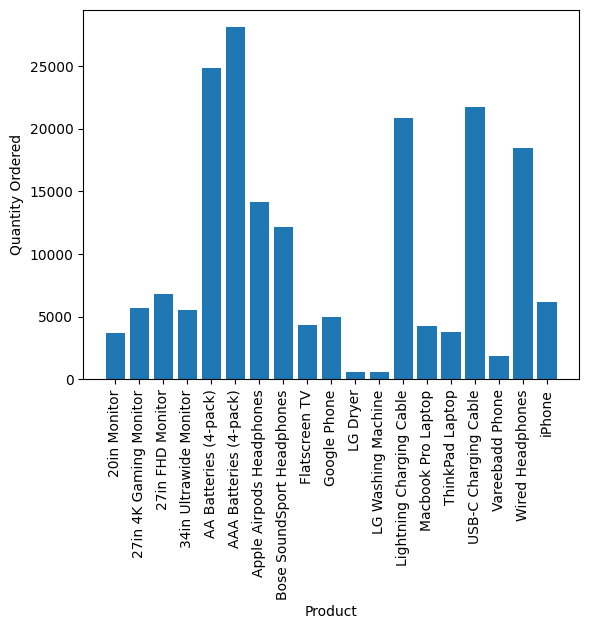

In [62]:
# Group data by 'Product'
product_group = all_data.groupby('Product')

# Ensure that 'Quantity Ordered' is numeric
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')

# Sum the 'Quantity Ordered' for each product
quantity_ordered = product_group['Quantity Ordered'].sum()

# Get the product names for the x-axis
keys = [pair for pair, df in product_group]

# Plot the bar chart
plt.bar(keys, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']

p